# Telcco AB

Kursnamn: AI
Klass: OPA21
Termin: HT22

## Importing the libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

## Importing the dataset

In [50]:
dataset = pd.read_csv('nbi_data_set.csv' , delimiter=';')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),"89,1","1949,4",No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,"29,75","301,9",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,9378-FXTIZ,Female,0,Yes,No,54,Yes,Yes,DSL,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),"70,15","3715,65",Yes
5370,6993-OHLXR,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,"68,95","119,75",Yes
5371,7547-EKNFS,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),"95,25","3959,35",Yes
5372,1596-BBVTG,Male,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),"75,35","2636,05",Yes


## Analysis of Dataset

In [51]:
#checking for duplicate values in dataset
dataset.duplicated().sum()

0

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5374 non-null   object
 1   gender            5374 non-null   object
 2   SeniorCitizen     5374 non-null   int64 
 3   Partner           5374 non-null   object
 4   Dependents        5374 non-null   object
 5   tenure            5374 non-null   int64 
 6   PhoneService      5374 non-null   object
 7   MultipleLines     5374 non-null   object
 8   InternetService   5374 non-null   object
 9   OnlineSecurity    5374 non-null   object
 10  OnlineBackup      5374 non-null   object
 11  DeviceProtection  5374 non-null   object
 12  TechSupport       5374 non-null   object
 13  StreamingTV       5374 non-null   object
 14  StreamingMovies   5374 non-null   object
 15  Contract          5374 non-null   object
 16  PaperlessBilling  5374 non-null   object
 17  PaymentMethod 

## Datacleaning

The customer id column is not a essential data point so it will be removed

In [53]:
dataset.drop('customerID', axis=1, inplace = True)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),"89,1","1949,4",No
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,"29,75","301,9",No


In [54]:
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].str.replace(',', '.')
dataset['TotalCharges'] = dataset['TotalCharges'].str.replace(',', '.')
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,Female,0,Yes,No,54,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),70.15,3715.65,Yes
5370,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,68.95,119.75,Yes
5371,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35,Yes
5372,Male,0,No,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.35,2636.05,Yes


In [55]:
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(dataset.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

data_type_general = dict()

for col in dataset.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


In [56]:
data_type = pd.DataFrame(dataset.dtypes).T.rename({0:'python data types'})
data_type

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object


As we can see monthly charges and total charges are of the type object so we would need to convert them to numeric values then to the type float

In [57]:
dataset['MonthlyCharges'] = pd.to_numeric(dataset['MonthlyCharges'], errors='coerce')
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,Female,0,Yes,No,54,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),70.15,3715.65,Yes
5370,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,68.95,119.75,Yes
5371,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35,Yes
5372,Male,0,No,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.35,2636.05,Yes


In [58]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,Female,0,Yes,No,54,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),70.15,3715.65,Yes
5370,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,68.95,119.75,Yes
5371,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35,Yes
5372,Male,0,No,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.35,2636.05,Yes


In [59]:
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].astype(float)
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [60]:
data_type = pd.DataFrame(dataset.dtypes).T.rename({0:'python data types'})
data_type

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


In [61]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


As we can see the monthly charges and total charges contain Nan so we have to convert these values to 0

In [62]:
dataset['TotalCharges'].isna().sum()


11

the data in total charges contains 11 Nan values so these will instead be converted to 0

In [63]:
dataset['TotalCharges'].fillna(0, inplace=True)
dataset['TotalCharges'].isna().sum()

0

## Exploratory Data Analysis

we can start of by changing the values of churn from yes and no to 1 and 0 by creating a dictionary called mapping and it will make it easier to analyze churn data 

In [64]:
mapping = {'Yes': 1, 'No': 0}

In [65]:
dataset['Churn'] = dataset['Churn'].replace(mapping)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,Female,0,Yes,No,54,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),70.15,3715.65,1
5370,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,68.95,119.75,1
5371,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35,1
5372,Male,0,No,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.35,2636.05,1


In [66]:
counts = dataset['Churn'].value_counts()

In [67]:
sum_yes = dataset['Churn'].sum()
sum_yes

200

In [68]:
sum_no = len(dataset) - dataset['Churn'].sum()
sum_no

5174

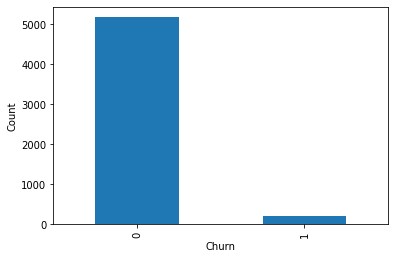

In [69]:
counts.plot.bar()
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

As we can see the amounts of no greatly outweigh the amount of yes

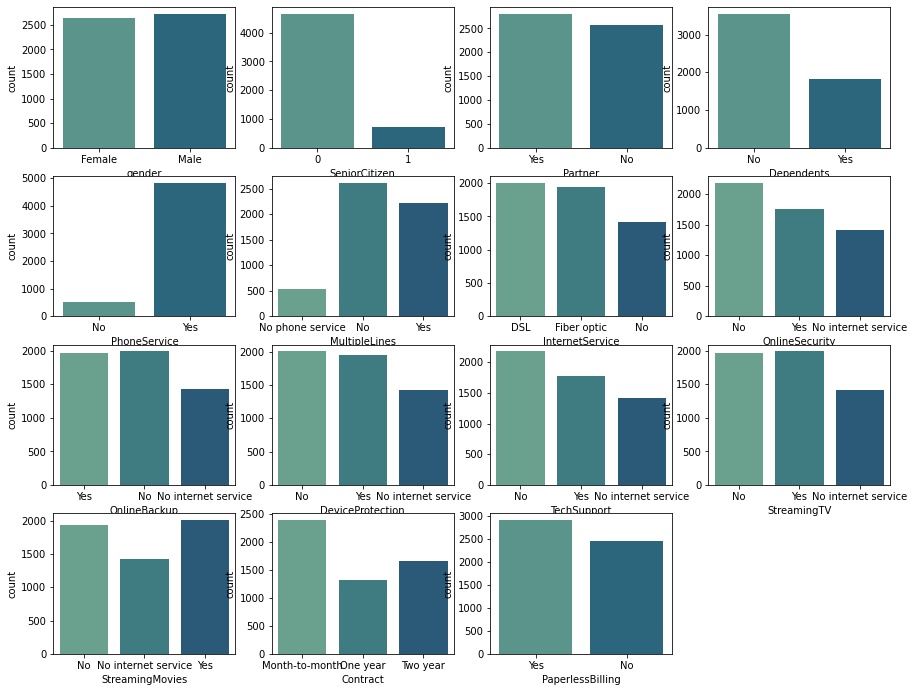

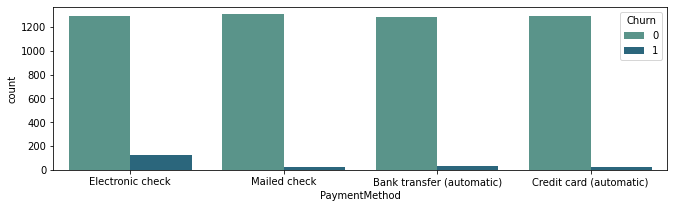

<Figure size 432x288 with 0 Axes>

In [70]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=dataset, x=dataset[variable], ax=ax, palette='crest')
plt.show() 
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=dataset, palette='crest')
plt.show() 
plt.tight_layout()


**Here we have count plots of categorical features** 

- we can se that there are an equal amount of men and women in the dataset
- there are similar levels of peeople with and without paretners
- most are not senior citizens

## Splitting the dataset into the Training set and Test set

first we split the data set into its dependent variables and what we are predicting

In [71]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Encoding the dependent variable

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [74]:
le.classes_

array([0, 1], dtype=int64)

this output shows us that customers that did not churn (no) are presented as 0 in the data and those who did (yes) are presented as 1

## Encoding the Independent Variables

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
cols=[0,2,3,5,6,7,8,9,10,11,12,13,14,15,16]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cols)], remainder='passthrough')

In [76]:
x_train_ohe = np.array(ct.fit_transform(X_train))
x_test_ohe = np.array(ct.fit_transform(X_test))

In [77]:
print(x_train_ohe[0])

[0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0
 0.0 1.0 0.0 0.0 0.0 0 71 53.95 3888.65]


In [78]:
print(x_train_ohe)

[[0.0 1.0 1.0 ... 71 53.95 3888.65]
 [0.0 1.0 0.0 ... 23 59.95 1406.0]
 [1.0 0.0 1.0 ... 46 99.8 4391.25]
 ...
 [0.0 1.0 0.0 ... 44 24.85 1013.6]
 [0.0 1.0 0.0 ... 2 74.2 140.1]
 [1.0 0.0 0.0 ... 69 61.4 4059.85]]


## Feature Scaling

Feature Scaling is used to scale the features so that they are proportional. This helps reduce the impact of outliers in the data.

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_ohe[-3:] = sc.fit_transform(x_train_ohe[-3:])
x_test_ohe[-3:] = sc.fit_transform(x_test_ohe[-3:])

In [80]:
print(x_train_ohe)

[[0.0 1.0 1.0 ... 71 53.95 3888.65]
 [0.0 1.0 0.0 ... 23 59.95 1406.0]
 [1.0 0.0 1.0 ... 46 99.8 4391.25]
 ...
 [-0.7071067811865475 0.7071067811865476 0.0 ... 0.2049829956280666
  -1.369341247984153 -0.4310546846474044]
 [-0.7071067811865475 0.7071067811865476 0.0 ... -1.3143027366740747
  0.9907399134134466 -0.9509390713087889]
 [1.4142135623730951 -1.414213562373095 0.0 ... 1.1093197410460078
  0.3786013345707053 1.381993755956193]]


# Model training

We will now be training different models on the data and compare the score the models to then see which one is the most accurate model. 

The models we will be training are 
- Logistic Regression
- Random Forests
- Decision Trees

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

logReg_model = LogisticRegression(random_state = 0)
logReg_model.fit(x_train_ohe, y_train_encode)

LogisticRegression(random_state=0)

In [82]:
yLog_pred = logReg_model.predict(x_test_ohe) 
print(np.concatenate((yLog_pred.reshape(len(yLog_pred),1), y_test_encode.reshape(len(y_test_encode),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 0]
 [0 0]]


### Making the Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(y_test_encode, yLog_pred)
print(cm)
accuracy_score(y_test_encode, yLog_pred)

[[1035    2]
 [  38    0]]


0.9627906976744186

In [84]:
print(classification_report(y_test_encode, yLog_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.96      1.00      0.98      1037
         Yes       0.00      0.00      0.00        38

    accuracy                           0.96      1075
   macro avg       0.48      0.50      0.49      1075
weighted avg       0.93      0.96      0.95      1075



## Random Forests

In [85]:
from sklearn.ensemble import RandomForestClassifier
randFor_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randFor_model.fit(x_train_ohe, y_train_encode)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Making the Confusion Matrix

In [86]:
yRand_pred = randFor_model.predict(x_test_ohe)
cm = confusion_matrix(y_test_encode, yRand_pred)
print(cm)
accuracy_score(y_test_encode, yRand_pred)

[[1033    4]
 [  37    1]]


0.9618604651162791

In [87]:
print(classification_report(y_test_encode, yRand_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1037
         Yes       0.20      0.03      0.05        38

    accuracy                           0.96      1075
   macro avg       0.58      0.51      0.51      1075
weighted avg       0.94      0.96      0.95      1075



## Decision Trees

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train_ohe, y_train_encode)

DecisionTreeRegressor(random_state=0)

In [89]:
yTree_pred = regressor.predict(x_test_ohe)
np.set_printoptions(precision=2)
print(np.concatenate((yTree_pred.reshape(len(yTree_pred),1), y_test_encode.reshape(len(y_test_encode),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [1. 0.]
 [0. 0.]]


### Making the Confusion Matrix

In [90]:
yTree_pred = regressor.predict(x_test_ohe)
cm = confusion_matrix(y_test_encode, yTree_pred)
print(cm)
accuracy_score(y_test_encode, yTree_pred)

[[1005   32]
 [  34    4]]


0.9386046511627907

In [91]:
print(classification_report(y_test_encode, yTree_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.97      0.97      0.97      1037
         Yes       0.11      0.11      0.11        38

    accuracy                           0.94      1075
   macro avg       0.54      0.54      0.54      1075
weighted avg       0.94      0.94      0.94      1075



## Conclusions

As we can see the logistic regression model preformed the best with a accuracy of about 96.3%. All the models chosen for this are classification models. This is because of the dataset and what we are predicting. That being predicting the churn rate. when we are predicting the churn rate what we are trying to do is to classify whether or not a given customer will churn or no. and classification does this by assigning items to a discrete group or class based on a specific set of features.

## References

- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
- https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification
- https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
- https://www.udemy.com/course/machinelearning/ 